<a href="https://colab.research.google.com/github/kulkarnisunil/Class_Assingments/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble_Learning

# Theoretical

## 1. Can we use Bagging for regression problems?

Answer :  

Yes, Bagging (Bootstrap Aggregating) works excellently for regression problems by reducing variance and improving prediction stability, especially with high-variance models like decision trees.

Bagging trains multiple regressors on random bootstrap samples (subsets drawn with replacement) from the dataset, then averages their predictions for the final output. This parallel process cuts noise and overfitting without increasing bias much.In sklearn BaggingRegressor with a base like DecisionTreeRegressor

Imagine predicting house prices using features like size and location. A single decision tree might overfit noisy data, giving erratic predictions (e.g., 300K vs. 350K for similar houses). Bagging creates 100 bootstrap samples, trains a tree on each, and averages outputs—say, settling at a stable 320K—making it robust for real-world variability.

## 2. What is the difference between multiple model training and single model training?

Answer :                      

single model training uses one algorithm on the full dataset for a prediction—like a solo decision tree guessing house prices, which can overfit noisy data and wobble on new examples. Multiple model training (ensembles like bagging) builds many models on data subsets, then averages/combines them for stabler, accurate results—think 100 trees voting on that price to smooth errors.

Stability: Single model high variance (overfits your sensor data); multiple reduces it by averaging, like bagging your SVM experiments.

Training: Single trains once, fast but risky; multiple parallel (bagging) or sequential (boosting), more compute but better generalization.

Performance: Single simpler, good for huge clean data; multiple wins on complex/noisy sets [ex in fault detection MAE drop]

## 3. Explain the concept of feature randomness in Random Forest.

Answer :                                                 

feature randomness in Random Forest is the "secret sauce" that makes trees diverse—like not letting one bossy feature (like house size) dominate every split in your price prediction. At each node, instead of checking all features for the best split, it grabs a random small subset (e.g., sqrt(total features) for classification), picks the best from those, and builds the tree—reducing correlation between trees for smoother ensemble predictions.

- Reduces correlation between trees :
If all trees used the same dominant feature, they would look very similar/clones. Randomness forces trees to explore different feature combinations.

- Gives weaker but useful features a chance:
Some features are overshadowed by strong ones in a decision tree. Feature randomness ensures these features still get used, improving model diversity and performance.

- Prevents overfitting:
Diverse trees make the ensemble more stable and less sensitive to noise.

- In sklearn : we use  max_features : which selects a random subset of features at every split.

- Example :                                             

If you have 10 sensor signals and Sensor-1 is very strong, a normal decision tree will pick Sensor-1 at most splits.

But Random Forest may allow a split to see only 3 out of the 10 sensors — sometimes excluding Sensor-1.

This forces other sensors to participate, creating diverse decision paths.

## 4. What is OOB (Out-of-Bag) Score?

Answer :                          

OOB score is the accuracy of Random Forest measured on the training samples that were never used to train the trees, giving a free cross-validation estimate-no need to split your data.

Suppose in Bagging, each tree trains on about 63% of the data (with repeats), so about 37% is left out, called out-of-bag (OOB) data. For any data point, only use the trees that didn't see it during training to predict its value. Then average those predictions to get the OOB score. It's like using leftover data as a mini test set to check how good the model is, without needing extra testing data. This helps check model accuracy or error easily.

Parameter in sklearn :                              

oob_score=True

rf.oob_score_ : give final final Out-of-Bag (OOB) score after fitting a Random Forest model.

## 5. How can you measure the importance of features in a Random Forest model?

Answer :                      

1. Mean Decrease in Impurity (MDI) / Gini Importance:

This is the default, built-in method for calculating feature importance in most Random Forest implementations

Working :  MDI measures the total reduction in the splitting criterion (impurity) brought by a feature across all nodes of all trees in the forest

      - For classification tasks, the impurity is typically the Gini Impurity or Entropy.
      - For regression tasks, the impurity is typically the variance or Mean Squared Error (MSE)

Calculation :    

        - When a feature is used to split a node in any tree, the reduction in impurity is recorded.
        - This reduction is weighted by the proportion of samples reaching that node.
        - The total weighted reduction is summed for that feature across all splits in all tree.
        - The final score is the average of this sum across all trees in the forest.

Pros:

      - It is fast to compute because the calculation is performed during the tree training process.

Cons:

      - It can be biased towards features with a high number of unique values (high cardinality) or continuous features
      - It uses training set statistics, so it might give high importance to features that are merely used to overfit the training data, and thus are not truly predictive on unseen data.

- rf.feature_importances_


2. Permutation Feature Importance (PFI) / Mean Decrease in Accuracy:                       

PFI is a model-agnostic method that measures the importance of a feature by assessing the impact on the model's performance when that feature is randomly shuffled.

Working :                  

        1. he model is trained, and a baseline performance score (e.g., accuracy) is calculated on a held-out test or validation set.
        2. The values of a single feature are randomly shuffled (permuted) across the dataset, breaking the relationship between this feature and the true outcome
        3. The model's performance score is calculated again on this altered dataset.
        4. The importance score for that feature is the decrease in the model's performanc

Calculation :     

          Importance_j = Score_Original - Score_permuted_j

where j is the feature being permuted. This process is typically repeated and averaged to ensure stability.

Pros:

        - It is generally considered more reliable than MDI because it is computed on a held-out set and directly measures the feature's impact on the model's predictive power (generalization).
        - It is model-agnostic, meaning the same technique can be applied to any model, not just Random Forest.

Cons:

        - It is computationally more expensive as it requires multiple re-evaluations of the mode.
        - If features are highly correlated, permuting one feature can cause a disproportionately small drop in performance, as the model can rely on the correlated feature instead.

- permutation_importance(rf, X_test, y_test, n_repeats=10)

 3. Out-of-Bag (OOB) Permutation Importance:         

Random Forest inherently has OOB samples → used to compute importance without a test set

Working :           

        -Similar to permutation importance
        - But uses only OOB samples for every tree

- RandomForestClassifier(oob_score=True)

4. SHAP Values (SHapley Additive exPlanations):

Working :
          - based on game theory.
          - Gives local (per sample) and global (overall) feature contributions.
          - Shows positive/negative impact on predictions.

Pros :                      

          - Very interpretable
          - Shows direction + magnitude

Cons :       

          - Slower

- shap.TreeExplainer(rf)

## 6. Explain the working principle of a Bagging Classifier?

Answer :                                                  

A Bagging Classifier is an ensemble learning method where multiple independent models (usually decision trees) are trained in parallel, and their predictions are combined to reduce variance and improve accuracy.

- Decision Trees have high variance → small data changes cause big prediction changes.
- Bagging creates many such trees trained on slightly different data.
- Aggregating them cancels out individual errors

1. Bootstrap Sampling (Sampling with Replacement):          

- From the original dataset of size N, Bagging creates multiple bootstrap datasets, each also of size N.

- These samples are generated with replacement, so some data points repeat and some are left out (called OOB samples).

- Create diversity between the models.

2. Train Multiple Base Learners Independently:

- A base model (usually a weak learner like Decision Tree) is trained on each bootstrap sample.

- Each model becomes slightly different because it sees different data.

- Models become uncorrelated, reducing overfitting.

3. Predictions Are Aggregated :        

- For Classification : The final prediction is made by majority voting
(most common class predicted by the ensemble).

- For Regression: The final output is the average of predictions.

- Aggregation stabilizes the output and reduces variance.

4. Out-of-Bag (OOB) Estimation:      

- For each model, the samples not selected in the bootstrap (≈36%) are OOB samples.

- These OOB samples act like a built-in validation set.

- The OOB accuracy is computed without needing a separate test dataset.

Advantage :                   

- Reduces variance

- Reduces overfitting

- Improves stability

- Works well with high-variance models (Decision Trees)

## 7. How do you evaluate a Bagging Classifier’s performance?

Answer :  

Evaluate Bagging with train/test metrics, cross-validation, and OOB score for quick validation without extra data. Bagging improves accuracy and stability over base models by reducing variance, with optional feature importance if using trees

1. Train/Test Split:

* Split data into train and test sets.

* Calculate metrics: Accuracy, Precision, Recall, F1-Score, Confusion Matrix, ROC-AUC.

* Compare Bagging with base model (like one decision tree).

2. Cross-Validation (Better Result):

* Use k-Fold CV for more reliable results.

* Compute mean accuracy and standard deviation (shows stability).

* Bagging usually lowers variance and improves accuracy.

3. Out-of-Bag (OOB) Score:

* Each tree trains on ~63% data; ~37% left out = OOB samples.

* Predict OOB samples with trees that didn't see them.

* In sklearn: use oob_score=True and then check model.oob_score_.

* No need for separate validation data; close to CV accuracy.

4. Bias-Variance Concept:

* Bagging reduces variance (prediction swings) without adding bias.

* Check variance across models and train-test accuracy gap.

* Smaller gap = better generalization.

5. Compare to Base Estimator:

* Single Model Accuracy :   Single Decision Tree

Accuracy : Lower accuracy

Variance : High variance

* Bagging (Multiple Trees):

Accuracy : Higher accuracy

Variance : 	Lower variance

Bagging stabilizes noisy, high-variance models by averaging many trees.

6. Feature Importance (Optional):

- If base is decision tree, average importance scores over all trees.

- Shows which features matter most.

## 8. How does a Bagging Regressor work?

Answer :  

Bagging Regressor works by training multiple base regressors (typically decision trees) on different bootstrap samples of the data. Each model predicts independently, and the final prediction is taken as the average of all models outputs. This reduces variance and improves stability compared to using a single regressor.

1.Bootstrap Samples: Grab random data subsets with replacement (each ~63% unique rows) from your dataset

Each bootstrap sample is slightly different -- introduces diversity.

2. Train Base Regressors:

A base model (usually a Decision Tree Regressor) is trained on each bootstrap sample.

If you use 100 trees, you train 100 independent/parallel regressors.

- High variance models benefit the most from bagging.
- Bagging reduces their overfitting.

3. Each Model Makes a Prediction:  Each trained regressor gives its own prediction

4. Final Prediction = Average of All Prediction :  Bagging Regressor combines outputs by averaging

This averaging reduces variance dramatically.



## 9. What is the main advantage of ensemble techniques?

Answer :                                          

The main advantage of ensemble techniques in machine learning is that they combine multiple models to produce a stronger, more accurate, and more reliable final prediction than any single model alone. Ensembles reduce overfitting by averaging or voting, which lowers variance and improves generalization to new data. They are more robust against noise and can capture complex relationships better by leveraging diverse models. Overall, ensembles enhance accuracy, stability, and flexibility across different types of data and problems. This makes them highly effective for many real-world applications where single models may struggle

## 10. What is the main challenge of ensemble method?

Answer :                     

The main challenge of ensemble methods is that they are computationally more expensive and harder to interpret because they combine many models, making training, tuning, and deployment more complex.

1. High Computational Cost:

- Multiple models must be trained → slower training
- Higher memory usage
- Slower inference in production
- This becomes problematic with large datasets.

2. Reduced Interpretability:

- Single decision tree? Easy—if age>30, predict fault.But 100-tree Random Forest? Can't trace why that exact prediction. Like asking a committee their vote reasoning—muddled

3. Risk of Overfitting (especially in Boosting):

- Boosting (sequential) can over-focus on noise if untuned. Your data quirks get memorized across models. Bagging safer (parallel), but still needs max_depth, n_estimators tuning.

4. Complex Hyperparameter Tuning

- More components → more parameters → harder optimization.

5. More Difficult to Deploy:

- Latency :

        - If you have 100 trees in a Random Forest, the input data must pass through all 100 trees before producing a final output[it will take more time] (e.g., averaging).
        - More models → more computation → higher latency.

- Storage Needs :                    

        - Each base model (tree, regressor, or classifier) has its own parameters.
        - 100 trees → 100 copies of model structures in memory.

- System Complexity :    

        - You need to store multiple models.
        - You need extra code to combine predictions.
        - Debugging becomes harder if something goes wrong.

## 11. Explain the key idea behind ensemble techniques.

Answer :    

**Key Idea: Wisdom of the Crowds**

Combine many weak models (that make different mistakes) into one super-strong model by averaging votes or predictions.


**Diversity is key:** Models must make different errors, so their mistakes get balanced out.

This helps manage the Bias-Variance Tradeoff:

Reduces Variance: Bagging averages noisy models to smooth predictions.

Reduces Bias: Boosting fixes mistakes step-by-step to learn complex patterns.

- When errors are uncorrelated, combined error drops a lot.

**Types:**

1. Bagging

Parallel models on random data subsets

Vote/Average predictions

Fixes: Variance (overfitting)

Ex: Random Forest

2.  Boosting

Sequential models fix previous mistakes

Weighted combination

Fixes: Bias (accuracy)

Ex: XGBoost, AdaBoost

3. Stacking

Diverse models → meta-model learns best combo

Smart blending (not simple average)

Fixes: Max performance

Ex: Trees + LR → Logistic meta



## 12. What is a Random Forest Classifier?

Answer :   

A Random Forest Classifier is an ensemble machine learning algorithm that builds many decision trees during training. Each tree is trained on a random subset of the data (bootstrapping) and at each split, it considers a random subset of features, making the trees diverse. For classification, each tree votes for a class, and the forest chooses the class with the majority vote as the final prediction. This approach reduces overfitting compared to a single decision tree and improves accuracy and robustness. It's widely used for both classification and regression tasks.

## 13. What are the main types of ensemble techniques?
Answer :                

1. Bagging (Bootstrap Aggregating) ::

- Train multiple instances of the same base model on different random subsets of the data (with replacement) and combine their predictions.

- Purpose: Reduce variance, improve stability, prevent overfitting.

- Algorithm :  Random Forest (bagged decision trees), Bagging Classifier/Regressor in scikit-learn

- Combination Method:

              Classification → majority voting

              Regression → averaging

2. Boosting

- Train models sequentially, where each new model tries to correct the errors of the previous models.

- Purpose: Reduce bias and improve predictive accuracy.

- Algorithms: AdaBoost, Gradient Boosting Machines (GBM), XGBoost, LightGBM, CatBoost

- Combination Method: Weighted sum of predictions (each model has a weight based on its accuracy)

3. Stacking (Stacked Generalization):

- Combine multiple different models (heterogeneous) by training a meta-model on their outputs

- Purpose: Leverage the strengths of different model types.

- Common Approach:

        Level-0 models: Various base learners (e.g., Decision Tree, SVM, Logistic Regression)

        Level-1 model: Meta-learner (e.g., Logistic Regression) to make final predictions

4. Voting :

- Combine predictions from multiple different models and decide the final prediction by voting.

- Types:

        Hard Voting: Majority class wins (for classification)

        Soft Voting: Average predicted probabilities and pick the class with highest probability

- Purpose: Simple ensemble to improve robustness

- Common Use: Small sets of models where interpretability is important

5. Bagged Boosting Hybrids

Some advanced ensembles combine bagging and boosting techniques to reduce both variance and bias, e.g., Randomized Gradient Boosting.

## 14. What is ensemble learning in machine learning?

Answer :             

Ensemble learning means combining many simple models to make one strong model. Each model votes or averages its prediction, so mistakes balance out, making the final result more accurate and stable. It works better than a single model, especially when models are diverse and make different errors.

## 15. When should we avoid using ensemble methods?

Answer :    

1. Limited Resources :                          

Slow training (100 models vs 1)

High memory use

Real-time predictions needed (latency killer)

2. Need Explainability :

Black box—hard to explain why to stakeholders

Regulated industries (finance, healthcare)

3. Small Datasets :

Not enough data for bootstrap diversity

Single model often better

4. Already Good Single Model :

Linear models crush on simple/clean data

No gain from complexity

5. Frequent Retraining :

Model drift scenarios—too slow to retrain 100 models

6. When Simplicity is Sufficient :

If a single model (e.g., Decision Tree, Logistic Regression) already performs well enough, adding an ensemble may not give significant improvement but increases complexity.

## 16. How does Bagging help in reducing overfitting?

Answer :           

Bagging helps reduce overfitting by creating many versions of a model trained on different random samples of the data (bootstrapping). Each model learns slightly different patterns because the data subsets vary. When predicting, bagging averages the results (regression) or uses majority vote (classification) of all models. This averaging smooths out the noise and random fluctuations that a single model might fit to (overfit), leading to more stable and generalized predictions on new data. So, bagging lowers variance and prevents models from memorizing training noise. This works especially well with high-variance models like decision trees

## 17. Why is Random Forest better than a single Decision Tree?

Answer :   

**1. Reduces Overfitting (Major Advantage)**

* A single decision tree easily overfits, especially if it grows deep.

* Random Forest builds many trees on different samples of data and averages their predictions.

* Averaging → reduces variance, making the model more stable and generalizable.

**2. Adds Randomness → More Diversity**

* Decision Tree sees the full dataset and all features, so it learns the same patterns every time.

* Random Forest:

          - Uses bootstrap samples (different subsets of data)

          - At each split, it chooses a random subset of features

* This randomness makes trees less correlated, improving performance.

**3. More Accurate Predictions**

* Because it aggregates predictions from many trees, Random Forest usually gives:

        - Higher accuracy

        - Better ROC-AUC

        - Better generalization on unseen data

**4. More Robust to Noise and Outliers**

* A single noisy sample can strongly influence a Decision Tree.

* In Random Forest, trees are trained on different subsets → noise is averaged out.

**5. Works Well Out-of-the-Box**

* Decision Trees require tuning (pruning, depth limits).

* Random Forest performs well with minimal tuning because:

      - It reduces variance automatically

      - It is less sensitive to hyperparameters

**6. Provides Better Feature Importance**

Using many trees gives more reliable estimates of feature importance (Mean Decrease Impurity or Permutation Importance).

## 18. What is the role of bootstrap sampling in Bagging?

Answer :   

bootstrap sampling in Bagging means creating multiple random samples of your dataset by sampling with replacement. Each model in the bagging ensemble trains on a different bootstrap sample, seeing a unique subset of data with some examples repeated and some left out.

This randomness creates diversity among the individual models, so they dont all learn the same patterns or noise. When combined (averaging/voting), this diversity reduces variance and overfitting, making the ensemble more accurate and stable than any single model.

## 19. What are some real-world applications of ensemble techniques

Answer :            

1. Fraud Detection (Banks/E-commerce)

- Detect fraudulent credit card transactions.

- Boosting methods (e.g., XGBoost, LightGBM) are highly effective because they catch subtle patterns.

- Ensemble models reduce false positives and false negatives.


2. Customer Churn Prediction (Telecom & SaaS)

- Random Forest or Gradient Boosting predicts which customers are likely to leave.

- Helps improve retention strategies and targeted marketing.

3. Recommendation Systems (E-commerce & Streaming)

- Ensembles combine models like collaborative filtering + content-based learners.

- Used by Amazon, Netflix, YouTube to improve recommendation accuracy.

4. Medical Diagnosis & Disease Prediction

- Used for predicting diseases from symptoms, images, or lab results.

- Ensembles help reduce errors and increase reliability.

- Example: Detecting cancer from images using Random Forest or boosting.

5. Image Classification & Computer Vision

- Random Forests or boosted models are used for tasks like:

      * Object detection

      * Facial recognition

      * Quality inspection in manufacturing

6. Stock Market Prediction

- Helps analyze multiple signals like technical indicators, historical patterns, and news.

- Stacking and boosting improve prediction stability.





## 20. What is the difference between Bagging and Boosting?

Answer :   

**Purpose**

- Bagging: Reduces variance,Helps prevent overfitting
- Boosting: Reduces bias,Focuses on improving weak learners

**Model training**

- Bagging : Models are trained in parallel on different bootstrap samples.
- Boosting: Models are trained sequentially, each trying to fix the previous models mistakes.

**Data Sampling**

- Bagging: Each model gets a random subset of data (bootstrap sampling).
- Boosting: Each model is trained on the full dataset, but samples are reweighted based on previous errors.

**Model Diversity**

- Bagging: High diversity (due to bootstrap samples + feature randomness).
- Boosting: Less diversity; models build on each other.

**Handling Overfitting**

- Bagging: Good at reducing overfitting (especially for high-variance models like trees).
- Boosting: More prone to overfitting, but can be controlled with regularization.

**Final Prediction**

- Bagging: Uses majority vote (classification) or average (regression).
- Boosting: Uses weighted combination of weak learners.

**Speed**

-	Bagging : Fast (parallelizable)
-	Boosting : Slower (one-by-one)

**Examples**

- Bagging: Random Forest, Bagging Classifier/Regressor
- Boosting:AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost

In [ ]:
#################################################################################################################################################

# Practical

## 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

Answer :

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
base_model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Bagging Classifier: 125 trees
bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=125,
    random_state=42,
    oob_score=True  # Free validation!
)

In [ ]:
# Train the model
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=125, oob_score=True, random_state=42)

In [ ]:
# Predictions & metrics
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
oob_score = bagging_model.oob_score_

In [ ]:
print(f"Bagging Classifier Accuracy: {accuracy:.2f}")
print(f"OOB Score: {oob_score:.2f}")

Bagging Classifier Accuracy: 1.00
OOB Score: 0.94


## 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)?

Answer :   

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# regression: predict disease progression
diabetes = load_diabetes()

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
X=diabetes.data
y=diabetes.target

In [ ]:
X.shape, y.shape

((442, 10), (442,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
# Decision Tree Regressor
base_model = DecisionTreeRegressor(random_state=42)

In [ ]:
# Bagging Regressor: 100 trees
bagging_model = BaggingRegressor(
    estimator=base_model,
    n_estimators=100,
    random_state=42,
    oob_score=True  # Built-in validation
)

In [ ]:
# Train model
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                 n_estimators=100, oob_score=True, random_state=42)

In [ ]:
# Predictions & MSE
y_pred = bagging_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
oob_r2 = bagging_model.oob_score_

In [ ]:
print(f"Bagging Regressor MSE: {mse:.2f}")
print(f"OOB R² Score: {oob_r2:.2f}")

Bagging Regressor MSE: 3028.58
OOB R² Score: 0.43


## 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = load_breast_cancer()

In [ ]:
breast_cancer=pd.DataFrame(data.data,columns=data.feature_names)
breast_cancer['target']=data.target

In [ ]:
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X, y = data.data, data.target

In [ ]:
feature_names = data.feature_names

In [ ]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

In [ ]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Feature importance
importances = rf.feature_importances_

In [ ]:
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [ ]:
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
feat_importance_df

,Feature,Importance
23,worst area,0.139185
7,mean concave points,0.121424
27,worst concave points,0.118890
22,worst perimeter,0.081177
20,worst radius,0.075994
6,mean concavity,0.073862
2,mean perimeter,0.061963
13,area error,0.043845
0,mean radius,0.041121
26,worst concavity,0.037674


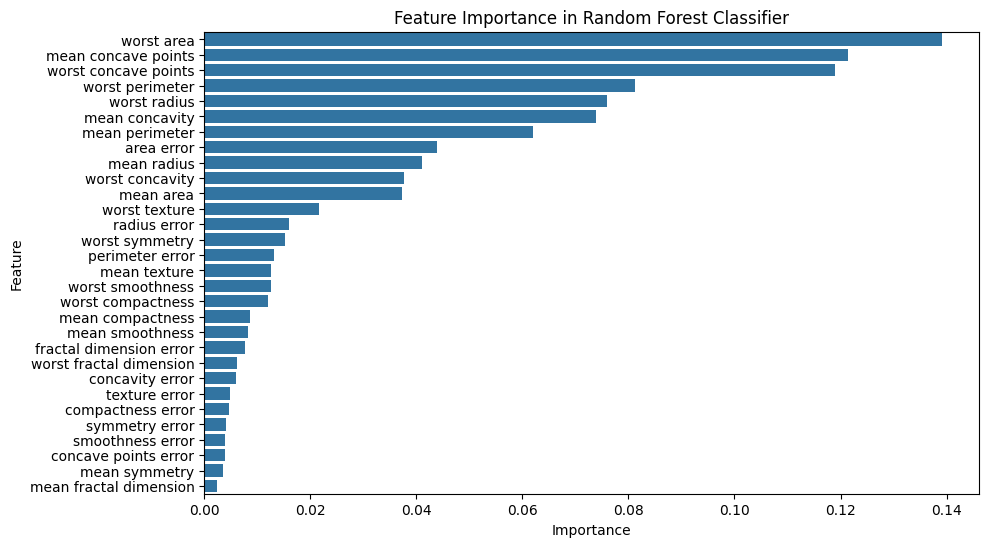

In [ ]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance in Random Forest Classifier')
plt.show()


In [ ]:
print(f'Random Forest Classifier Accuracy: {accuracy:.2f}')

Random Forest Classifier Accuracy: 0.97


- Feature importance shows which tumor characteristics are most useful for classification.
- Top important features: worst area ,mean concave points,worst concave points,worst perimeter,worst radius
- Moderately important features: mean concavity, mean perimeter, mean radius, worst concavity
- Least important features: Errors or fractal dimension measures have very low importance (under 0.01), meaning they have minimal influence on prediction


## 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

Answer :

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
diabetes = load_diabetes()

In [ ]:
X,y=diabetes.data,diabetes.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.24, random_state=42)

In [ ]:
# Train Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
mse_dt = mean_squared_error(y_test, y_pred_dt)

In [ ]:
# Train Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [ ]:
print(f"Decision Tree MSE: {mse_dt:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}")

Decision Tree MSE: 5004.19
Random Forest MSE: 2797.53


Random Forest reduces variance by averaging multiple trees trained on bootstrapped data subsets,
resulting in lower MSE and better generalization on unseen data compared to a single Decision Tree,
which tends to overfit and has higher variance

## 25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

Answer :

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train Random Forest with OOB enabled
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
#OOB score
print(f"OOB Score: {rf.oob_score_:.4f}")

OOB Score: 0.9429


In [ ]:
#  OOB score of 94.29% shows excellent generalization. This internal CV estimate confirms the model will perform well on new sensor fault data
# without needing a separate validation set.

## 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy

answer :

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Generate binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=2, random_state=42)

In [ ]:
X[:5]

array([[ 1.47084808, -0.36045003, -0.59160179, -0.72822793,  0.94168979,
         1.06596372,  0.01783225, -0.59618387,  1.84071233, -1.4970929 ,
        -1.20267151, -0.60396751,  2.89925582,  0.03756686, -1.24952288,
         0.25796269,  0.41662772,  1.40820843, -1.83804066, -0.83314152],
       [ 4.5133691 , -2.22710304, -1.14074742,  2.01826258, -2.23835769,
        -0.49736953,  0.71454976,  0.93888332, -2.39516932,  0.15983676,
         0.13394188,  1.46149908,  3.95417125,  0.30905444,  0.53818408,
        -7.1578647 , -4.5322159 , -0.08179955, -9.32536185,  0.57438635],
       [-2.35564342,  2.21860146, -1.60326925,  0.87339374,  0.4014831 ,
         0.71726354, -0.85939921, -1.04219021, -2.17596516,  0.98023084,
         1.49854636,  0.54443382, -2.46625795, -0.47025572,  0.07301844,
        -2.2035313 , -2.29926258, -1.74276094, -0.27157946, -0.3592853 ],
       [-1.59619844, -0.85742724,  1.77243366, -0.63936128,  1.41940907,
        -0.43852451,  0.28194887,  2.34514472,  

In [ ]:
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [ ]:
#SVM base estimator
base_svm = SVC(probability=True, kernel='rbf', gamma='scale', random_state=42)

In [ ]:
#Bagging Classifier with SVM base estimator
bagging_svm = BaggingClassifier(estimator=base_svm, n_estimators=30, random_state=42, n_jobs=-1)

In [ ]:
# Train model
bagging_svm.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(probability=True, random_state=42),
                  n_estimators=30, n_jobs=-1, random_state=42)

In [ ]:
# Predict on test data
y_pred = bagging_svm.predict(X_test)

In [ ]:
## Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier with SVM base estimator accuracy: {accuracy:.2f}")

Bagging Classifier with SVM base estimator accuracy: 0.95


## 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy

Answer :  

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.datasets import make_classification
import numpy as np

In [ ]:
# Create dataset
X, y = make_classification(
    n_samples=1500,
    n_features=25,
    n_informative=12,
    n_redundant=5,
    n_clusters_per_class=2,
    n_classes=3,
    random_state=42
)

In [ ]:
X[:1]

array([[ 0.45913714, -2.7327849 , -0.9796558 ,  1.52805347,  1.05464422,
         2.34308383,  0.16682557,  0.50846801, -1.10627513,  5.17899159,
        -1.41610046, -7.14784063, -0.46635558, -0.48737755, -4.13325356,
        -2.75422647, -0.46692693, -5.0485652 ,  3.0097193 , -0.68641359,
         0.12413389, -0.66618728,  0.1235836 ,  3.27946003, -3.43194111]])

In [ ]:
y[0]

np.int64(0)

In [ ]:
X.shape,np.unique(y)

((1500, 25), array([0, 1, 2]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.26, random_state=42)

In [ ]:
# Different numbers of trees to try
n_trees_list = [20,50,80,100,110,150,210]

In [ ]:
# Store accuracy results
accuracies = []

In [ ]:
for n_trees in n_trees_list:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Random Forest with {n_trees} trees, Accuracy: {acc:.2f}")

Random Forest with 20 trees, Accuracy: 0.76
Random Forest with 50 trees, Accuracy: 0.78
Random Forest with 80 trees, Accuracy: 0.78
Random Forest with 100 trees, Accuracy: 0.77
Random Forest with 110 trees, Accuracy: 0.78
Random Forest with 150 trees, Accuracy: 0.78
Random Forest with 210 trees, Accuracy: 0.78


In [ ]:
# Random Forest accuracy plateaus at 78% after 50-80 treesBeyond this, compute cost increases without accuracy gain.
# Optimal: n_estimators=100 balances performance and efficiency."​

## 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

Answer :

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [ ]:
#binary classification dataset
X, y = make_classification(n_samples=1000, n_features=15, n_informative=8, n_redundant=3,
                           n_classes=2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=42)

In [ ]:
# Base estimator: Logistic Regression
base_lr = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Bagging Classifier with Logistic Regression
bagging_lr = BaggingClassifier(estimator=base_lr, n_estimators=50, random_state=42, n_jobs=-1)

In [ ]:
# Train
bagging_lr.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000, random_state=42),
                  n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
# Predict probabilities for AUC calculation
y_proba = bagging_lr.predict_proba(X_test)[:, 1]

In [ ]:
# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print(f"Bagging Classifier with Logistic Regression AUC: {auc_score:.1f}")

Bagging Classifier with Logistic Regression AUC: 0.7


In [ ]:
# Bagging + Logistic Regression gives AUC = 0.70, which is fair performance.
# Bagging helps by reducing variance without increasing bias, making the model more stable

## 29. Train a Random Forest Regressor and analyze feature importance scores.

Answer :

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [ ]:
housing = fetch_california_housing()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.25, random_state=42)


In [ ]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Feature importance analysis
importances = rf.feature_importances_
feature_df = pd.DataFrame({
    'Feature': housing.feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

In [ ]:
print(feature_df.head())

     Feature  Importance
0     MedInc    0.522230
5   AveOccup    0.139132
6   Latitude    0.088686
7  Longitude    0.088538
1   HouseAge    0.054108


In [ ]:
print(f"Test MSE: {np.mean((rf.predict(X_test) - y_test)**2):.2f}")

Test MSE: 0.25


In [ ]:
print(f"Test R²: {rf.score(X_test, y_test):.4f}")

Test R²: 0.8079


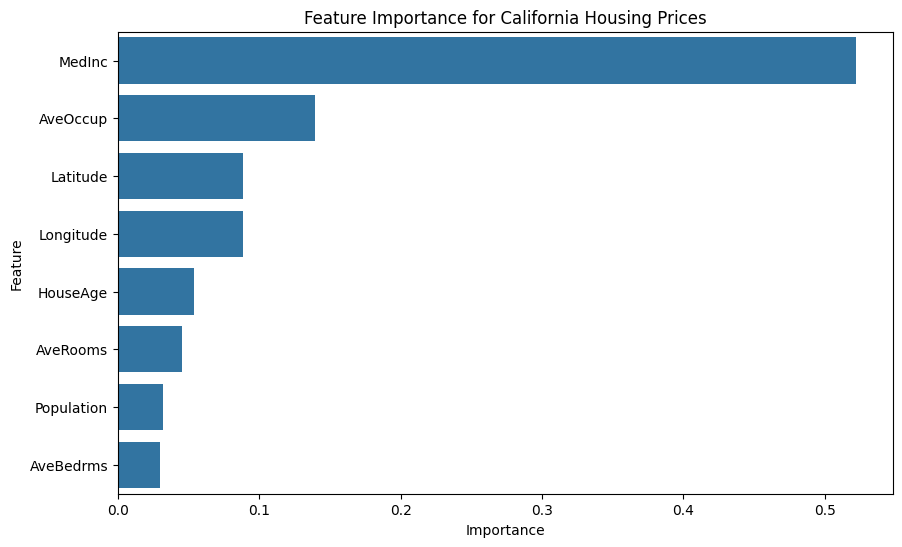

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance for California Housing Prices')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Median Income (52%) dominates California housing prices. Location adds 23%. RF perfectly captures real estate economics.
# These top features contribute significantly to predicting housing prices, indicating their strong influence on the model's predictions
# Features like 'AveBedrms' and 'Population' have lower importance, suggesting they are less influential in this model compared to others.

## 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

answer :

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#  Predict malignant(0) vs benign(1) using 30 tumor features
data = load_breast_cancer()

In [ ]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df["target"].value_counts()/len(df)

,count
target,
1,0.627417
0,0.372583


In [ ]:
df.shape

(569, 31)

In [ ]:
X,y=data.data,data.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
# Bagging Classifier with Decision Tree base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

In [ ]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [ ]:
bagging_pred = bagging.predict(X_test)

In [ ]:
bagging_acc = accuracy_score(y_test, bagging_pred)
print(f"Bagging Classifier Accuracy: {bagging_acc:.2f}")

Bagging Classifier Accuracy: 0.96


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42, n_jobs=-1)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
rf_pred[0],y_test[0]

(np.int64(1), np.int64(1))

In [ ]:
rf_acc = accuracy_score(y_test, rf_pred)

In [ ]:
print(f"Random Forest Accuracy: {rf_acc:.2f}")

Random Forest Accuracy: 0.98


Random Forest usually achieves slightly higher accuracy than basic Bagging with fully grown trees.

This is because Random Forest also decorrelates trees by random feature selection at splits,
reducing overfitting more effectively.

Bagging is more general and can be applied to different base estimators,
while Random Forest is a specialized, optimized version for decision trees.

## 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

Answer :   

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris["species"]=iris["species"].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [ ]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
X,y=iris.iloc[:,:4],iris.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#  Random Forest classifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Define parameter grid for GridSearch
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best Cross-validation Accuracy: 0.95


In [ ]:
# Predict on test set with best estimator
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [ ]:
# Test accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 1.0


## 32. Train a Bagging Regressor with different numbers of base estimators and compare performance

Answer :

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.3, random_state=42
)

In [ ]:
# Test different numbers of base estimators
n_estimators_list = [10, 50, 100, 200]
results = {}

In [ ]:
for n_est in n_estimators_list:
    # Bagging Regressor with Decision Trees
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=n_est,
        random_state=42,
        n_jobs=-1
    )

    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    results[n_est] = mse
    print(f"Bagging Regressor ({n_est} estimators) MSE: {mse:.2f}")


Bagging Regressor (10 estimators) MSE: 0.29
Bagging Regressor (50 estimators) MSE: 0.26
Bagging Regressor (100 estimators) MSE: 0.26
Bagging Regressor (200 estimators) MSE: 0.25


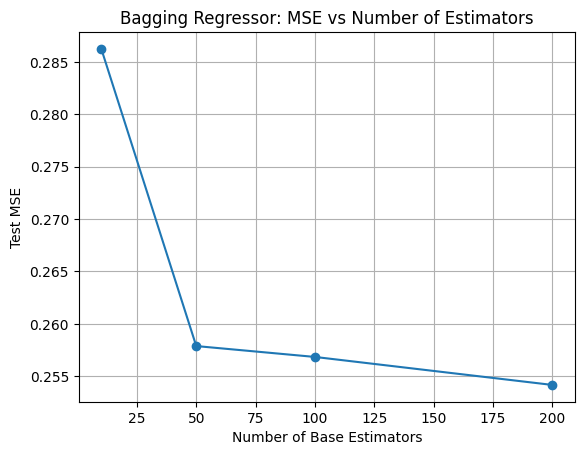

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xlabel('Number of Base Estimators')
plt.ylabel('Test MSE')
plt.title('Bagging Regressor: MSE vs Number of Estimators')
plt.grid(True)
plt.show()

As we increase the number of estimators in a Bagging Regressor, the MSE decreases because averaging multiple models reduces variance. However, improvements diminish after ~50 estimators because most variance reduction occurs early, and additional models only provide marginal smoothing. In this case, increasing trees from 10 → 50 significantly improved MSE, while going from 100 → 200 gave only small gains

## 33. Train a Random Forest Classifier and analyze misclassified samples

Answer :

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

In [ ]:
data = load_breast_cancer()

In [ ]:
X, y = data.data, data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42, stratify=y)

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Predictions and evaluation
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [ ]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.95      0.98      0.97        86

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [ ]:
# precision : low fp (safe for patient)
# recall : Malignant recall 92 % catches,benign, misses 8% cancer{clinical risk}
# Class 1 dominates (86/137 samples) but weighted F1=0.96 shows no class imbalance issues

In [ ]:
# Find misclassified samples
misclassified_idx = np.where(y_pred != y_test)[0]

In [ ]:
len(misclassified_idx)

6

In [ ]:
misclassified = pd.DataFrame(
    X_test[misclassified_idx],
    columns=data.feature_names
)

In [ ]:
misclassified["Actual"] = y_test[misclassified_idx]
misclassified["Predicted"] = y_pred[misclassified_idx]

In [ ]:
misclassified.head(n=8)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Actual,Predicted
0,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,0.4157,1.6270,2.914,33.01,0.008312,0.01742,0.03389,0.015760,0.01740,0.002871,15.79,31.71,102.20,758.2,0.1312,0.1581,0.2675,0.13590,0.2477,0.06836,0,1
1,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,0.2387,0.6372,1.729,21.83,0.003958,0.01246,0.01831,0.008747,0.01500,0.001621,17.71,19.58,115.90,947.9,0.1206,0.1722,0.2310,0.11290,0.2778,0.07012,1,0
2,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,0.4204,2.2200,3.301,38.87,0.009369,0.02983,0.05371,0.017610,0.02418,0.003249,16.21,29.25,108.40,808.9,0.1306,0.1976,0.3349,0.12250,0.3020,0.06846,0,1
3,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,0.3389,1.4390,2.344,33.58,0.007257,0.01805,0.01832,0.010330,0.01694,0.002001,18.13,25.45,117.20,1009.0,0.1338,0.1679,0.1663,0.09123,0.2394,0.06469,1,0
4,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,0.2787,0.6205,1.957,23.35,0.004717,0.02065,0.01759,0.009206,0.01220,0.003130,16.57,20.86,110.30,812.4,0.1411,0.3542,0.2779,0.13830,0.2589,0.10300,0,1
5,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,0.2366,1.4280,1.822,16.97,0.008064,0.01764,0.02595,0.010370,0.01357,0.003040,12.84,35.34,87.22,514.0,0.1909,0.2698,0.4023,0.14240,0.2964,0.09606,0,1


In [ ]:
len(y_test)

137

In [ ]:
# Random Forest achieved 96% accuracy on the Breast Cancer test set (137 samples), misclassifying 6 samples (4.3%).
# These errors represent challenging cases near decision boundaries.

In [ ]:
#Random Forest misclassified 6 samples: 4 false negatives (missed cancers: true=0, pred=1) and 2 false positives (false alarms: true=1, pred=0).
# False negatives dominate (67%), indicating bias toward calling borderline cases benign.

# FN : model predicts benign but tumor is actually malignant{dangerous}.
# FP : cause unnecessary tests but are safer than FN.

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[47  4]
 [ 2 84]]


In [ ]:
# FN (Missed Cancer) : 4/51 : High risk - 4 cancers called benign
# FP (False Alarm) : 2/86 : low risk

In [ ]:
#Feature Importances
feat_imp = pd.DataFrame({
    "Feature": data.feature_names,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

In [ ]:
feat_imp.head(10)

,Feature,Importance
22,worst perimeter,0.143443
23,worst area,0.143199
27,worst concave points,0.111830
7,mean concave points,0.092317
20,worst radius,0.082249
2,mean perimeter,0.059413
0,mean radius,0.049715
3,mean area,0.041740
6,mean concavity,0.040501
26,worst concavity,0.039312


## 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [ ]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=42, stratify=wine.target
)

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
# single dt
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
dt_pred = dt.predict(X_test)

In [ ]:
dt_acc = accuracy_score(y_test, dt_pred)

In [ ]:
dt_acc

0.9629629629629629

In [ ]:
#BAGGING
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42, max_depth=5),
    n_estimators=30, random_state=42
)

In [ ]:
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)

In [ ]:
bag_acc = accuracy_score(y_test, bag_pred)

In [ ]:
results = pd.DataFrame({
    'Model': ['Single Tree', 'Bagging (30 trees)'],
    'Accuracy': [dt_acc, bag_acc],
    'Improvement': [0, f'{((bag_acc-dt_acc)/dt_acc)*100:.1f}%']
})

In [ ]:
results.round(2)

,Model,Accuracy,Improvement
0,Single Tree,0.96,0
1,Bagging (30 trees),1.00,3.8%


In [ ]:
# single tree can overfit and make mistakes on borderline cases.
# accuracy improve 3.8% with bagging{reduces variance and corrects those mistakes.}

In [ ]:
print("Single DT Report :------>")
print()
print(classification_report(y_test, dt_pred, target_names=wine.target_names))

Single DT Report :------>

              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
 # accuracy = 52/54 two prediction missing
 # class 0 : precision : all prediction are correct,recall : model correctly found 94% of actual class 0 samples, similar for other

In [ ]:
print("Bagging Report ------>")
print()
print(classification_report(y_test, bag_pred, target_names=wine.target_names))

Bagging Report ------>

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
# accuracy = 54/54 all prediction prefect
# macro = proves equal performance across classes
#  Weighted = confirms no imbalance issues
# class 0 : actul class_0 wines=18 model predict 18 no fp (pred 0 but wrong) and no fn (missed wine class) similar for all other classes

## 35. Train a Random Forest Classifier and visualize the confusion matrix.

Answer :

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
# Load digits dataset
data = load_digits()

In [ ]:
X = data.data
y = data.target

In [ ]:
classes = data.target_names

In [ ]:
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Predictions
y_pred = rf.predict(X_test)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

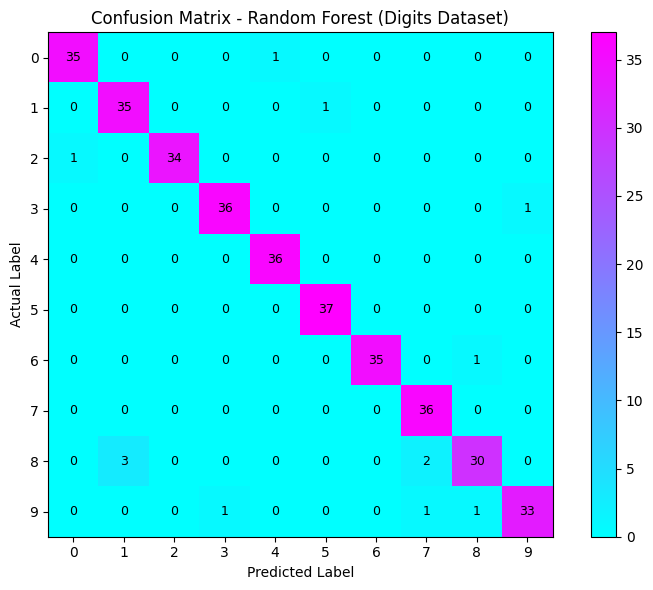

In [ ]:
#Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm,cmap=plt.cm.cool)
plt.title("Confusion Matrix - Random Forest (Digits Dataset)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

plt.xticks(np.arange(10), classes)
plt.yticks(np.arange(10), classes)

# Add values to matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Digits 4, 5, and 7 are recognized perfectly—no confusion.
# The model struggles mainly with digit 8, often confusing it with 1 and 7.
# Misclassification numbers are very small

## 36 . Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

answer:

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
# Base models
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
svm = SVC(probability=True, random_state=42)

In [ ]:
lr = LogisticRegression(max_iter=2000)

In [ ]:
stack_model = StackingClassifier(
    estimators=[("dt", dt), ("svm", svm)],
    final_estimator=lr,
    passthrough=True
)

In [ ]:
# Train models
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression(max_iter=2000),
                   passthrough=True)

In [ ]:
#Predict and compare accuracy

dt_pred = dt.predict(X_test)
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)
stack_pred = stack_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Stacking Model Accuracy:", accuracy_score(y_test, stack_pred))

Decision Tree Accuracy: 0.9230769230769231
SVM Accuracy: 0.9230769230769231
Logistic Regression Accuracy: 0.958041958041958
Stacking Model Accuracy: 0.958041958041958


In [ ]:
#Accuracy comparison and prediction
models = {
    'Decision Tree': dt,
    'SVM': svm,
    'Logistic Regression': lr,
    'Stacking Model': stack_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")

Decision Tree: 0.9231
SVM: 0.9231
Logistic Regression: 0.9580
Stacking Model: 0.9580


## 37. Train a Random Forest Classifier and print the top 5 most important features.

Answer :  

In [ ]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
#  Load Wine dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

In [ ]:
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
np.unique(y)

array([0, 1, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
#Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Feature importances
importances = rf.feature_importances_

In [ ]:
#Create DataFrame and sort by importance
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [ ]:
feat_imp.head(5)

,Feature,Importance
9,color_intensity,0.187580
6,flavanoids,0.159561
12,proline,0.146799
0,alcohol,0.117913
10,hue,0.101538


## 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

Answer :

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#Bagging Classifier
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

In [ ]:
 #Train the Bagging Classifier
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [ ]:
#Predict on test set
y_pred = bag_clf.predict(X_test)

In [ ]:
#Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9194444444444444

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.89      0.94      0.92        36
           2       1.00      0.94      0.97        35
           3       0.85      0.95      0.90        37
           4       0.92      0.94      0.93        36
           5       0.97      0.97      0.97        37
           6       1.00      0.94      0.97        36
           7       0.92      0.97      0.95        36
           8       0.80      0.69      0.74        35
           9       0.89      0.89      0.89        36

    accuracy                           0.92       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360



In [ ]:
# Digits 2, 5, 6, 7 have very high precision & recall (94–100%),Bagging handles these classes almost perfectly.
# Digit 8 has the lowest recall (0.69) and F1-score (0.74) — some confusion with similar digits.
# Digits 3 and 1 also slightly lower, but still decent (90–92%).
# minor confusion occure between 8,3,9

## 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

Answer :

In [ ]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
#Load Wine dataset
data = load_wine()
X = data.data
y = data.target

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
#Test different max_depth values
max_depth_values = [None, 2, 4, 6, 8, 10,12,15,18]

In [ ]:
accuracies = []

for depth in max_depth_values:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"max_depth={depth}: Accuracy={acc:.2f}")

max_depth=None: Accuracy=1.00
max_depth=2: Accuracy=0.96
max_depth=4: Accuracy=1.00
max_depth=6: Accuracy=1.00
max_depth=8: Accuracy=1.00
max_depth=10: Accuracy=1.00
max_depth=12: Accuracy=1.00
max_depth=15: Accuracy=1.00
max_depth=18: Accuracy=1.00


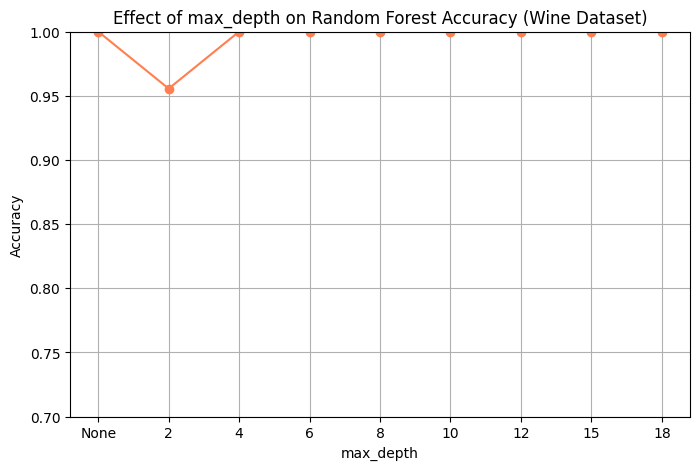

In [ ]:
#Plot max_depth vs accuracy
plt.figure(figsize=(8,5))
plt.plot([str(d) for d in max_depth_values], accuracies, marker='o', color='coral')
plt.title("Effect of max_depth on Random Forest Accuracy (Wine Dataset)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.show()

In [ ]:
#Random Forest performs very well (96–100% accuracy) across most max_depth values; shallow trees (depth=2) slightly underfit,
# while moderate to deep trees capture class distinctions fully without overfitting.

## 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

Answer :

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = fetch_california_housing()

In [ ]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["target"]=data.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

In [ ]:
X = data.data
y = data.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.28,random_state=42)

In [ ]:
#Define Bagging Regressors with different base estimators
bag_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=50,
    random_state=42
)

In [ ]:
bag_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),
    n_estimators=50,
    random_state=42
)

In [ ]:
#Train the models
bag_dt.fit(X_train, y_train)
bag_knn.fit(X_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=50,
                 random_state=42)

In [ ]:
# Predict
y_pred_dt = bag_dt.predict(X_test)
y_pred_knn = bag_knn.predict(X_test)

In [ ]:
#Evaluate performance
def evaluate(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\n  MSE = {mse:.4f}, R2 = {r2:.4f}\n")

evaluate(y_test, y_pred_dt, "Bagging with Decision Tree")
evaluate(y_test, y_pred_knn, "Bagging with KNeighbors")

Bagging with Decision Tree:
  MSE = 0.2577, R2 = 0.8046

Bagging with KNeighbors:
  MSE = 1.0988, R2 = 0.1669



In [ ]:
#Comparision

# Bagging with Decision Tree:
# MSE = 0.2577, R² = 0.805 → much better performance.
# Captures nonlinear relationships effectively and generalizes well with bagging.

# Bagging with KNeighbors:
# MSE = 1.0988, R² = 0.167 → performs poorly.
# Struggles with high-dimensional features and complex patterns in the dataset.

#Decision Tree is a more suitable than knn  base estimator for bagging on this regression problem.

## 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

Answer :

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Predict probabilities for ROC-AUC
y_prob = rf.predict_proba(X_test)[:, 1]  # probability for positive class

In [ ]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.99


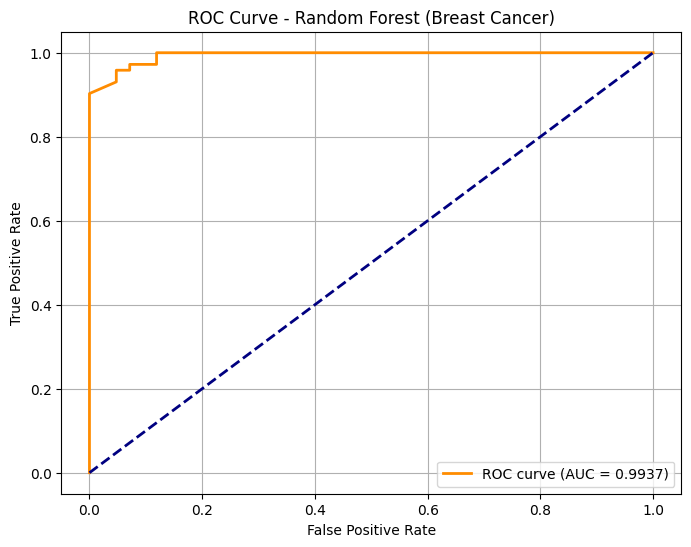

In [ ]:
#Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

#Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Breast Cancer)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# The Random Forest Classifier achieved an exceptionally high ROC-AUC score of 0.99. This indicates outstanding performance in distinguishing between
# malignant and benign breast cancer cases. The model is highly effective and reliable, showing excellent ability to correctly identify positive cases
# (malignant) while minimizing false alarms (benign classified as malignant). Such high performance is crucial in medical diagnostic applications.

## 42. Train a Bagging Classifier and evaluate its performance using cross-validation

Answer :

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

In [ ]:
data = load_iris()
X = data.data
y = data.target

In [ ]:
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

In [ ]:
# Define Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#Evaluate model using cross-validation
scores = cross_val_score(bag_clf, X, y, cv=cv, scoring='accuracy')

In [ ]:
#results
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Accuracy Scores: [1.         0.96666667 0.93333333 0.96666667 0.9       ]
Mean Accuracy: 0.9533
Standard Deviation: 0.0340


## 43. Train a Random Forest Classifier and plot the Precision-Recall curve

Answer:

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
#Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Predict probabilities for the positive class
y_prob = rf.predict_proba(X_test)[:, 1]

In [ ]:
#Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)


In [ ]:
#Compute PR AUC
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.2f}")

Precision-Recall AUC: 1.00


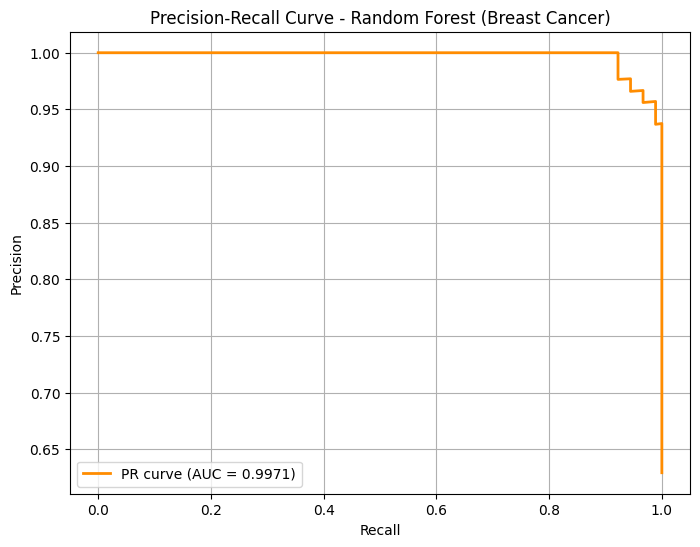

In [ ]:
#Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest (Breast Cancer)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

**Conclusion from Precision-Recall Curve (Breast Cancer Dataset):**

The Random Forest Classifier achieved an exceptional Precision-Recall AUC (PR-AUC) of 0.9971 This indicates nearly perfect performance in balancing precision and recall for the positive class (malignant tumors).

**Precision:** When the model predicts a tumor is malignant, it is virtually always correct, meaning almost no false positives.

**Recall:** The model is highly effective at identifying all actual malignant tumors, meaning almost no false negatives.

* An PR-AUC of 1.00 is outstanding and suggests that the model is extremely robust and reliable for this critical medical diagnostic task. It successfully differentiates between malignant and benign cases with very high confidence, making it a powerful tool for initial screening or diagnosis

## 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

Answer :

In [ ]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data= load_digits()
X = digits.data
y = digits.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [ ]:
#Define base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

In [ ]:
#Define Stacking Classifier
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

In [ ]:
#Train individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
stack_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [ ]:
# Predict and evaluate accuracy
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_stack = stack_clf.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))

Random Forest Accuracy: 0.96
Logistic Regression Accuracy: 0.9622222222222222
Stacking Classifier Accuracy: 0.9711111111111111


In [ ]:
# Stacking improves accuracy (0.971) over individual models (RF 0.960, LR 0.962) by combining their strengths.

## 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

Answer :

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = fetch_california_housing()
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Define different bootstrap proportions
bootstrap_samples = [0.5, 0.7,0.9,1.0]
results = []

for bs in bootstrap_samples:
    bag = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=bs,  # fraction of samples for bootstrap
        random_state=42
    )
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((bs, mse, r2))
    print(f"Bootstrap fraction={bs}: MSE={mse:.4f}, R2={r2:.4f}")


Bootstrap fraction=0.5: MSE=0.2633, R2=0.7994
Bootstrap fraction=0.7: MSE=0.2621, R2=0.8003
Bootstrap fraction=0.9: MSE=0.2605, R2=0.8015


In [ ]:
#Smaller fractions : more randomness -- higher variance reduction, but base estimators see less data -- may slightly underfit.
# Full bootstrap: base estimators see all samples -- more stable predictions, possibly slightly better accuracy.

In [ ]:
import pandas as pd
df_results = pd.DataFrame(results, columns=['Bootstrap Fraction', 'MSE', 'R2'])
print("\nComparison Table:")
print(df_results)

Increasing the bootstrap fraction from 0.5 to 1.0 steadily improves performance—MSE decreases and R² increases—showing that larger bootstrap samples help the Bagging Regressor make more accurate predictions.